<a href="https://colab.research.google.com/github/agarwalarpit99/Deep-Learning-projects/blob/master/Identify_the_apparels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [0]:
fastion_mnist=keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=fastion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

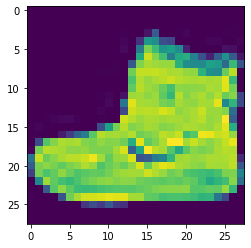

In [5]:
plt.imshow(train_images[0])

In [0]:
train_images=train_images/255.0
test_images=test_images/255.0

In [6]:
train_labels
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)

Using TensorFlow backend.


In [0]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train_images,train_labels,test_size=0.25,random_state=2)

In [10]:
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPool2D

In [10]:
model=Sequential()
model.add(Conv2D(96,kernel_size=3,input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(96,kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(units=96,kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10,activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 45000 samples, validate on 15000 samples
Epoch 1/10





45000/45000 [==============================] - 31s 688us/step - loss: 0.5434 - acc: 0.8037 - val_loss: 0.3525 - val_acc: 0.8708
Epoch 2/10
45000/45000 [==============================] - 18s 399us/step - loss: 0.3852 - acc: 0.8597 - val_loss: 0.3318 - val_acc: 0.8779
Epoch 3/10
45000/45000 [==============================] - 18s 399us/step - loss: 0.3466 - acc: 0.8749 - val_loss: 0.3038 - val_acc: 0.8906
Epoch 4/10
45000/45000 [==============================] - 18s 397us/step - loss: 0.3230 - acc: 0.8818 - val_loss: 0.2944 - val_acc: 0.8927
Epoch 5/10
45000/45000 [==============================] - 18s 399us/step - loss: 0.3041 - acc: 0.8884 - val_loss: 0.2790 - val_acc: 0.8983
Epoch 6/10
45000/45000 [==============================] - 18s 398us/step - loss: 0.2925 - acc: 0.8925 - val_loss: 0.2845 - val_acc: 0.8976
Epoch 7/10
450

In [0]:
predictions=model.predict(xtest)

In [16]:
predictions

array([[2.5125341e-06, 7.7218608e-08, 2.5662474e-09, ..., 3.7988458e-02,
        2.1153270e-05, 9.6195263e-01],
       [1.6817909e-01, 3.5292938e-04, 2.8338255e-02, ..., 3.8143060e-07,
        8.2201179e-04, 4.9560219e-07],
       [3.9370819e-03, 4.6403456e-04, 8.5609638e-05, ..., 1.4852256e-07,
        7.0237427e-04, 5.7211986e-09],
       ...,
       [8.1737124e-07, 5.7894163e-13, 8.0420025e-02, ..., 2.3160060e-13,
        2.2120743e-09, 4.9547091e-13],
       [1.3102760e-05, 8.3920725e-11, 2.7784063e-08, ..., 1.0479484e-04,
        7.2677199e-06, 1.3896617e-07],
       [2.8034351e-06, 1.9175393e-10, 8.9175700e-08, ..., 9.7277540e-01,
        1.9038978e-05, 6.0649542e-03]], dtype=float32)

In [0]:
lt=list(predictions)

In [18]:
max(lt[0])

0.9619526

In [0]:
#for converting index to the particular label or value 
lt2=[]
x=0.0
ind=0
for i in range(0,len(predictions)):
  lt=[]
  lt=list(predictions[i])
  x=0
  for j in range(0,len(lt)):
    if lt[j]>x:
      x=lt[j]
      ind=j
  lt2.append(ind)

In [0]:
#for converting index to the particular label or value 
lt3=[]
x=0.0
ind=0
for i in range(0,len(ytest)):
  lt=[]
  lt=list(ytest[i])
  x=0
  for j in range(0,len(lt)):
    if lt[j]>x:
      x=lt[j]
      ind=j
  lt3.append(ind)

In [25]:
lt2[:5]

[9, 6, 3, 0, 8]

In [26]:
lt3[:5]

[9, 6, 3, 6, 8]

In [17]:
print(count)

22497508


In [20]:
print(len(lt3))

15000


In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(lt2,lt3))

ValueError: ignored